<a href="https://colab.research.google.com/github/Rahuljha-cell/Learning-AI-ML/blob/main/Kernel_SVM_Classification_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

## Importing libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [8]:
dataset = pd.read_csv('Instagram Ads Kernel SVM.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into Training & Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
print(X_train)

[[ 0.13445177  1.60168298]
 [-0.4532462   2.01761313]
 [ 0.72214974  0.15981952]
 [ 0.25199136 -0.67204079]
 [-0.10062742 -0.39478175]
 [-0.21816702 -0.45026683]
 [-0.5707858   2.04531408]
 [ 2.13262486  0.88070965]
 [ 1.3098477  -1.53168523]
 [ 1.07476852  1.79575599]
 [ 0.83968933  1.87894202]
 [ 0.95722892 -1.28212714]
 [ 1.66246649 -1.03256904]
 [ 1.3098477   1.04708172]
 [-0.21816702 -0.4224827 ]
 [ 0.36953095  0.07663348]
 [-1.74618174 -1.58708712]
 [ 0.25199136  0.07663348]
 [-1.15848377  0.10433443]
 [-0.10062742 -0.67204079]
 [-0.21816702 -0.61663889]
 [-1.62864214  0.15981952]
 [ 0.25199136  0.04884935]
 [-1.15848377  0.10433443]
 [ 0.25199136 -0.45026683]
 [ 0.25199136 -0.4224827 ]
 [ 0.83968933  0.85300871]
 [ 1.78000608 -0.45026683]
 [ 0.95722892  1.18575283]
 [-1.15848377 -1.69805729]
 [ 0.72214974 -1.22664205]
 [ 0.48707055  1.57398203]
 [-1.62864214 -0.11752271]
 [-0.5707858  -1.61487126]
 [ 0.83968933 -0.92159888]
 [-1.04094417 -0.53345286]
 [-1.15848377  0.29840744]
 

## Kernal SVM Training on Training set

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

## Predicting

In [14]:
print(classifier.predict(sc.transform([[36, 28000]])))

[1]


## Predicting Test set results

In [15]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[34  3]
 [ 3 20]]


0.9

## Visualizing Test Set results

<ipython-input-17-e9d0203c888f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


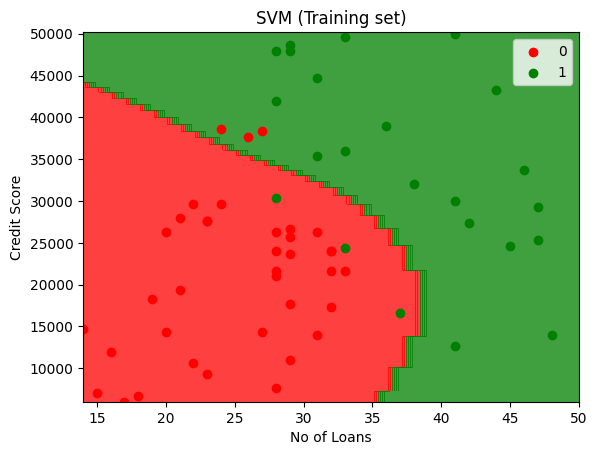

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('No of Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()

## Visualising Training set results

<ipython-input-19-c3a0898db33d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


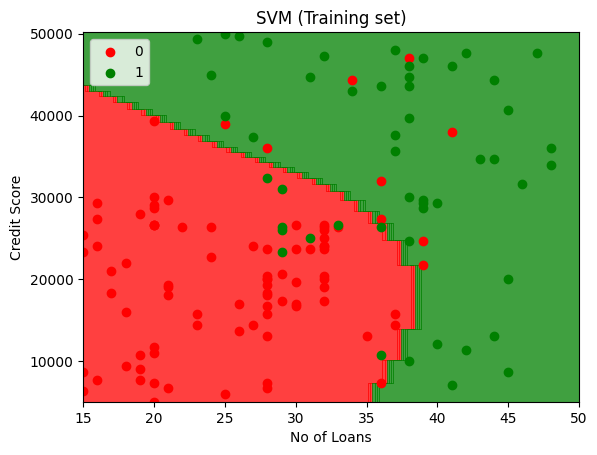

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('No of Loans')
plt.ylabel('Credit Score')
plt.legend()
plt.show()